In [1]:
import os
import re
import pandas as pd
import tensorflow as tf

from tensorflow.keras import utils


data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz",
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

84131840/84125825 [==============================] - 9s 0us/step


In [0]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r") as f:
            data["review"].append(f.read())
    
    return pd.DataFrame.from_dict(data)


In [0]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df, neg_df])

In [0]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [5]:
train_df.head()

,review,sentiment
0,"Samuel Fuller is an interesting filmmaker, mai...",1
1,I first saw this at a foreign film festival. I...,1
2,"One reason Pixar has endured so well, and been...",1
3,"In the ten years since Wildside aired, nothing...",1
4,It's hard to watch this movie without thinking...,1


In [6]:
os.path.dirname(data_set)

'/root/.keras/datasets'

In [0]:
reviews = list(train_df["review"])

In [0]:
tokenized_reviews = [r.split() for r in reviews]
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_eumjeol = [len(s.replace(" ", "")) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

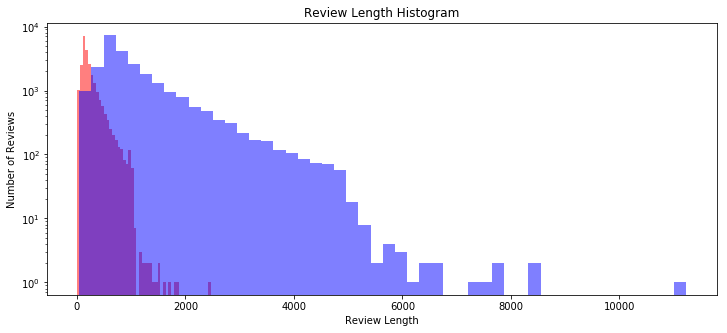

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color="r", label="word")
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color="b", label="alphabet")
plt.yscale("log", nonposy="clip")
plt.title("Review Length Histogram")
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")

In [10]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f9e62516dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e62520630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e6252a358>],
 'means': [<matplotlib.lines.Line2D at 0x7f9e6252a048>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e62520cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e62516f28>,
  <matplotlib.lines.Line2D at 0x7f9e625202e8>]}

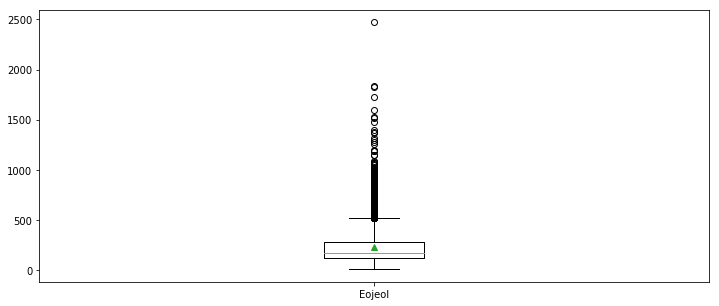

In [11]:
plt.figure(figsize=(12, 5))

plt.boxplot([review_len_by_token],
            labels=["Eojeol"],
            showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9e624edcf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e624f7550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e62502278>],
 'means': [<matplotlib.lines.Line2D at 0x7f9e624f7f28>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e624f7be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e624ede48>,
  <matplotlib.lines.Line2D at 0x7f9e624f7208>]}

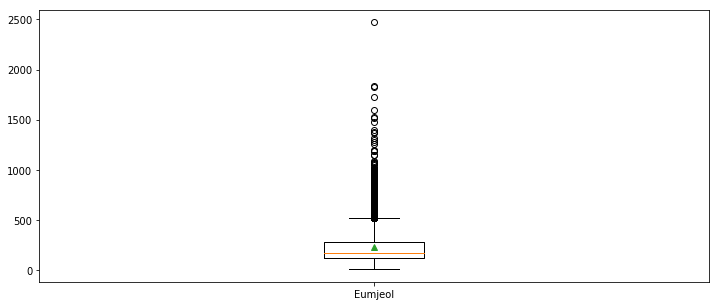

In [12]:
plt.figure(figsize=(12, 5))

plt.boxplot([review_len_by_token],
            labels=["Eumjeol"],
            showmeans=True)

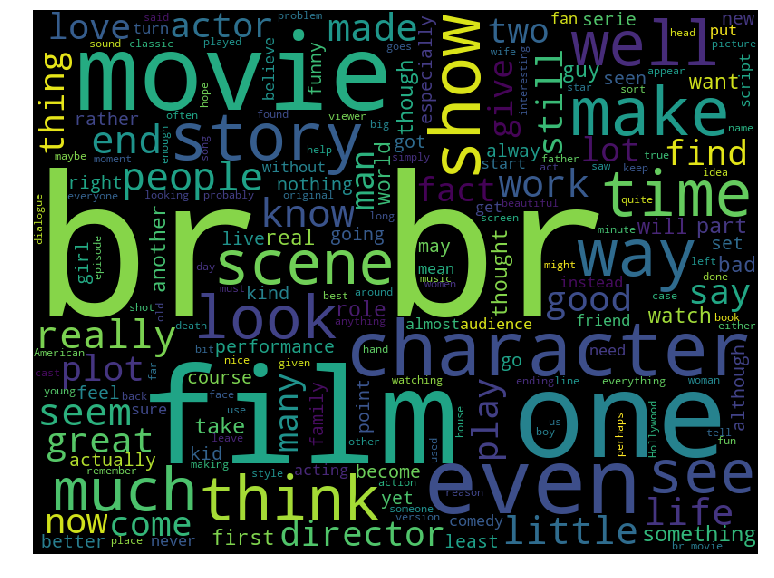

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=800,
                      height=600).generate(" ".join(train_df["review"]))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

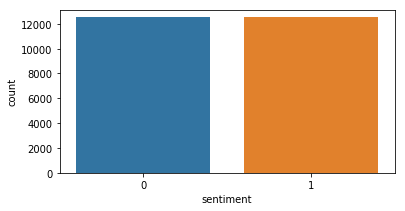

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sentiment = train_df["sentiment"].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df["sentiment"])